# By Nisarg Devani

## Task 1

## Import Librabries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read CSV file from URL

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Correletion

In [3]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


* Here, Correlation between **Hours and Scores** = 0.97
* correlation is near to 1 so there is **Strong Positive Linear Relationship**.

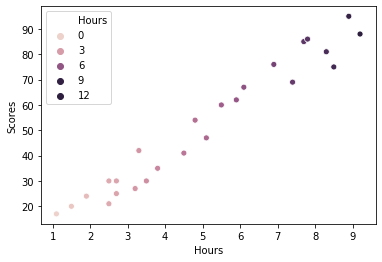

In [4]:
sns.scatterplot(x = df.Hours, y = df.Scores ,hue = df.Hours)

## Select Label (Output) and Attribute (Input)
   >y = Label(output), X = Attribute(Input)


In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

## Select Test and Train Data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Build Regression Model

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## plot regression line in Scatter plot
* equation for regression line <br>
    **y = mX + b**<br>
    >&nbsp;**y** = output<br>
    >&nbsp;**X** = input<br>
    >&nbsp;**m** = slop of line<br>
    >&nbsp;**b** = y intercept
           

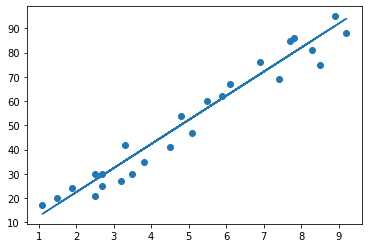

In [10]:
slop = model.coef_
intercept = model.intercept_
line = slop * X + intercept
plt.scatter(X, y)
plt.plot(X, line)

## Predict Test Data

In [11]:
predict = model.predict(X_test)

In [12]:
predict

array([29.39054301, 27.4038607 , 17.47044914, 85.01764772, 93.95771812,
       27.4038607 , 47.27068381])

In [13]:
y_test

array([25, 30, 20, 81, 88, 21, 41], dtype=int64)

In [14]:
model_output = pd.DataFrame({'y_actual' : y, 'y_predict': model.predict(X)})
model_output.head()

,y_actual,y_predict
0,21,27.403861
1,47,53.230731
2,27,34.357249
3,75,87.004330
4,30,37.337272


## Check Accuracy of model

In [16]:
from sklearn import metrics

> Mean Absolute Error Shows Average of how Far away our Predicted values to Actual values.

In [17]:
print("Mean Absolute Error = {}".format(metrics.mean_absolute_error(y_test, predict)))

Mean Absolute Error = 4.595163361210406


In [18]:
print("R-square value = {}".format(metrics.r2_score(y_test,predict)))

R-square value = 0.9669611897340569


## Task
> Predict Score for Studing Hour = 9.25 hrs/day.

In [15]:
hour = 9.25
task_predict = model.predict([[hour]])
print("If Student Studing  = {} hour".format(hour))
print("Predicted Score for it = {}".format(task_predict[0]))

If Student Studing  = 9.25 hour
Predicted Score for it = 94.45438870259741
